# Documenting Decoding Anti-racism statements

Our simple word count analysis yield 7,750 unique words.
We removed X stop words (common grammatical units with no real meaning)
We found Y keywords using co-occurance analysis
Using protest slogans and hashtags we derived Z significant words, of which ZZ were present in the total corpus.

In [1]:
'''
IMPORT TEXT FILE
'''
import nltk
import os

curdir = os.getcwd()
textdir = os.path.join(curdir, "texts")
filename = "test_text.txt"

text = []
with open(os.path.join(textdir, filename), 'r') as file:
        text = file.read()
print(text)

The AISES family shares in the pain and grief of the black community resulting from the murder of George Floyd and the long history of oppression and violence against their communities. As indigenous people, at AISES, we are guided by the traditional knowledge of our ancestors who have lived and died upon these lands since time immemorial. Among this knowledge is the deep understanding that “we are all related.” It is this respect for relationships and community that guides AISES’ programs and partnerships. For example, for several years now, AISES has been a part of the 50k Coalition alongside the National Society of Black Engineers, the Society of Women Engineers, and the Society of Hispanic Professional Engineers. Through partnerships like this, we have come to understand that our combined communities are stronger together. We have come to recognize that we are all working toward the same goals – diversity, equity, and inclusion for all communities and have learned that we can suppo

But notice!
We have text that are not words. Acronyms, hashtags, and entity names are included in this text. 
Acronyms-- all caps
Hashtags-- preceded with '\#' character
Entities-- tbd (George Floyd, National Society of Black Engineers)

Let's take a note of these...

# Step 1. Pulling out Special Text

First, we need to find hashtags, url's, @mentions (twitter handles). Finding these depends on punctuation requirements, so we have to get these first before moving on to word-based text parsing. 

## Finding Hashtags and @mentions

These are easy, just need a regex to identify the '#' or '@' followed by an string of characters. The first space indicates the end of the token

In [25]:
import re
hashtags = re.findall(r'(#\w+)', text)
mentions = re.findall(r'(@\w+)', text)
print(hashtags)
print(mentions)

['#blacklivesmatter']
[]


## Finding URL's

Leverage the structure of hyperlinks to find URL's in the text. 

# Step 2. Tokenization of Text

Now that punctuation-based terms are found, we can get a file of text and convert to individual strings (tokens). Tokenization by default ignores punctuation, only returning a-z characters and word level grammar marks (like apostrophes).

Tokenizing is a necessary step to start working on more word-based analysis.

In [2]:
'''
TOKENIZE TEXT
'''
from nltk.tokenize import word_tokenize

tokenizer = nltk.RegexpTokenizer(r"\w+") #regex to get all words, including numbers, but not punctuaction
tokens = tokenizer.tokenize(text)

print(tokens)

['The', 'AISES', 'family', 'shares', 'in', 'the', 'pain', 'and', 'grief', 'of', 'the', 'black', 'community', 'resulting', 'from', 'the', 'murder', 'of', 'George', 'Floyd', 'and', 'the', 'long', 'history', 'of', 'oppression', 'and', 'violence', 'against', 'their', 'communities', 'As', 'indigenous', 'people', 'at', 'AISES', 'we', 'are', 'guided', 'by', 'the', 'traditional', 'knowledge', 'of', 'our', 'ancestors', 'who', 'have', 'lived', 'and', 'died', 'upon', 'these', 'lands', 'since', 'time', 'immemorial', 'Among', 'this', 'knowledge', 'is', 'the', 'deep', 'understanding', 'that', 'we', 'are', 'all', 'related', 'It', 'is', 'this', 'respect', 'for', 'relationships', 'and', 'community', 'that', 'guides', 'AISES', 'programs', 'and', 'partnerships', 'For', 'example', 'for', 'several', 'years', 'now', 'AISES', 'has', 'been', 'a', 'part', 'of', 'the', '50k', 'Coalition', 'alongside', 'the', 'National', 'Society', 'of', 'Black', 'Engineers', 'the', 'Society', 'of', 'Women', 'Engineers', 'and', 

## Recognizing Entities

Named Entity Recognition uses existing algorithms to identity names of people, organization, places, dates and times. 
Let's see how it does with our text.

**First, Identify Parts of Speech**

Note: The pos_tags use different tagsets. The default is UPenn tags. A list can be found by running the code here:
``` 
nltk.download('tagsets')
nltk.help.upenn_tagset()
```

_(NN are nouns. NNP are proper nouns. NNPS is plural proper nouns.)_

In [4]:
from nltk.tag import pos_tag

'''tag part of speech first. result is list of (word, tag)'''


tagged_tokens = nltk.pos_tag(tokens)
print(tagged_tokens)

[('The', 'DT'), ('AISES', 'NNP'), ('family', 'NN'), ('shares', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('pain', 'NN'), ('and', 'CC'), ('grief', 'NN'), ('of', 'IN'), ('the', 'DT'), ('black', 'JJ'), ('community', 'NN'), ('resulting', 'VBG'), ('from', 'IN'), ('the', 'DT'), ('murder', 'NN'), ('of', 'IN'), ('George', 'NNP'), ('Floyd', 'NNP'), ('and', 'CC'), ('the', 'DT'), ('long', 'JJ'), ('history', 'NN'), ('of', 'IN'), ('oppression', 'NN'), ('and', 'CC'), ('violence', 'NN'), ('against', 'IN'), ('their', 'PRP$'), ('communities', 'NNS'), ('As', 'IN'), ('indigenous', 'JJ'), ('people', 'NNS'), ('at', 'IN'), ('AISES', 'NNP'), ('we', 'PRP'), ('are', 'VBP'), ('guided', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('traditional', 'JJ'), ('knowledge', 'NN'), ('of', 'IN'), ('our', 'PRP$'), ('ancestors', 'NNS'), ('who', 'WP'), ('have', 'VBP'), ('lived', 'VBN'), ('and', 'CC'), ('died', 'VBN'), ('upon', 'IN'), ('these', 'DT'), ('lands', 'NNS'), ('since', 'IN'), ('time', 'NN'), ('immemorial', 'JJ'), ('Among', 'IN'

Let's try creating noun phrases with regular expressions. 

In [17]:
#Noun phrase is determined by determiner (optional), adjectives (any number) and a noun
pattern1 = 'NP: {<DT>?<JJ>*<NN.*>+}'
parser1 = nltk.RegexpParser(pattern1)
parsed = parser1.parse(tagged_tokens)
print(parsed)

(S
  (NP The/DT AISES/NNP family/NN shares/NNS)
  in/IN
  (NP the/DT pain/NN)
  and/CC
  (NP grief/NN)
  of/IN
  (NP the/DT black/JJ community/NN)
  resulting/VBG
  from/IN
  (NP the/DT murder/NN)
  of/IN
  (NP George/NNP Floyd/NNP)
  and/CC
  (NP the/DT long/JJ history/NN)
  of/IN
  (NP oppression/NN)
  and/CC
  (NP violence/NN)
  against/IN
  their/PRP$
  (NP communities/NNS)
  As/IN
  (NP indigenous/JJ people/NNS)
  at/IN
  (NP AISES/NNP)
  we/PRP
  are/VBP
  guided/VBN
  by/IN
  (NP the/DT traditional/JJ knowledge/NN)
  of/IN
  our/PRP$
  (NP ancestors/NNS)
  who/WP
  have/VBP
  lived/VBN
  and/CC
  died/VBN
  upon/IN
  (NP these/DT lands/NNS)
  since/IN
  (NP time/NN)
  immemorial/JJ
  Among/IN
  (NP this/DT knowledge/NN)
  is/VBZ
  (NP the/DT deep/JJ understanding/NN)
  that/IN
  we/PRP
  are/VBP
  all/DT
  related/JJ
  It/PRP
  is/VBZ
  (NP this/DT respect/NN)
  for/IN
  (NP relationships/NNS)
  and/CC
  (NP community/NN)
  that/WDT
  guides/VBZ
  (NP AISES/NNP programs/NNS)
  a

In [15]:
#Noun phrase is determiner (opt), Proper Nouns, optional linking determiners (of,for) other Proper Nouns
pattern2 = 'NP: {<NNP>+<IN>?<NNP.*>+}'
parser2 = nltk.RegexpParser(pattern2)
parsed = parser2.parse(tagged_tokens)
print(parsed)

(S
  The/DT
  AISES/NNP
  family/NN
  shares/NNS
  in/IN
  the/DT
  pain/NN
  and/CC
  grief/NN
  of/IN
  the/DT
  black/JJ
  community/NN
  resulting/VBG
  from/IN
  the/DT
  murder/NN
  of/IN
  (NP George/NNP Floyd/NNP)
  and/CC
  the/DT
  long/JJ
  history/NN
  of/IN
  oppression/NN
  and/CC
  violence/NN
  against/IN
  their/PRP$
  communities/NNS
  As/IN
  indigenous/JJ
  people/NNS
  at/IN
  AISES/NNP
  we/PRP
  are/VBP
  guided/VBN
  by/IN
  the/DT
  traditional/JJ
  knowledge/NN
  of/IN
  our/PRP$
  ancestors/NNS
  who/WP
  have/VBP
  lived/VBN
  and/CC
  died/VBN
  upon/IN
  these/DT
  lands/NNS
  since/IN
  time/NN
  immemorial/JJ
  Among/IN
  this/DT
  knowledge/NN
  is/VBZ
  the/DT
  deep/JJ
  understanding/NN
  that/IN
  we/PRP
  are/VBP
  all/DT
  related/JJ
  It/PRP
  is/VBZ
  this/DT
  respect/NN
  for/IN
  relationships/NNS
  and/CC
  community/NN
  that/WDT
  guides/VBZ
  AISES/NNP
  programs/NNS
  and/CC
  partnerships/NNS
  For/IN
  example/NN
  for/IN
  several/JJ


RegEx2 seems more useful in pulling out names of people and organizations.

# Finding Significant N-grams

tbd


# Stemming and Lemmatization

tbd

In [6]:
text

'The AISES family shares in the pain and grief of the black community resulting from the murder of George Floyd and the long history of oppression and violence against their communities. As indigenous people, at AISES, we are guided by the traditional knowledge of our ancestors who have lived and died upon these lands since time immemorial. Among this knowledge is the deep understanding that “we are all related.” It is this respect for relationships and community that guides AISES’ programs and partnerships. For example, for several years now, AISES has been a part of the 50k Coalition alongside the National Society of Black Engineers, the Society of Women Engineers, and the Society of Hispanic Professional Engineers. Through partnerships like this, we have come to understand that our combined communities are stronger together. We have come to recognize that we are all working toward the same goals – diversity, equity, and inclusion for all communities and have learned that we can supp

# Calculating and Visualizing Term Frequency

tbd

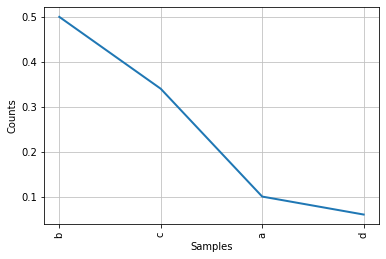

In [28]:
# Term Frequency
tf = {'a': .1, 'b':.5, 'c': .34, 'd': .06}
fd = nltk.FreqDist(tf)
fd.plot()